In [1]:
import pandas as pd
filename = '/kaggle/input/federal-reserve-economic-dataset/fred_series.csv'
df = pd.read_csv(filepath_or_buffer=filename, encoding='Windows-1252', index_col=['id'], parse_dates=['observation_start', 'observation_end', 'last_updated'])
df.head()

,title,observation_start,observation_end,frequency,units,seasonal_adjustment,last_updated,popularity,group_popularity,notes
id,,,,,,,,,,
PCU113310113310,Producer Price Index by Industry: Logging,1981-12-01,2023-09-01,Monthly,Index Dec 1981=100,Not Seasonally Adjusted,2023-10-11 08:05:34-05:00,1,13,NaN
PCU113310113310M,Producer Price Index by Industry: Logging: Mis...,1986-06-01,2022-07-01,Monthly,Index Jun 1986=100,Not Seasonally Adjusted,2022-12-09 08:00:44-06:00,2,2,NaN
PCU113310113310MM,Producer Price Index by Industry: Logging: Mis...,1986-06-01,1998-08-01,Monthly,Index Jun 1986=100,Not Seasonally Adjusted,2015-05-15 08:52:31-05:00,0,2,NaN
PCU113310113310P,Producer Price Index by Industry: Logging: Pri...,1981-12-01,2023-09-01,Monthly,Index Dec 1981=100,Not Seasonally Adjusted,2023-10-11 08:03:03-05:00,2,2,NaN
PCU1133111331,Producer Price Index by Industry: Logging,1981-12-01,2023-09-01,Monthly,Index Dec 1981=100,Not Seasonally Adjusted,2023-10-11 08:03:04-05:00,1,13,NaN


In [2]:
df.nunique()

title                  4814
observation_start       165
observation_end         181
frequency                 5
units                   109
seasonal_adjustment       3
last_updated           1520
popularity               72
group_popularity         76
notes                  3731
dtype: int64

In [3]:
from plotly.express import histogram
for column in ['popularity', 'group_popularity']:
    histogram(data_frame=df, x=column, log_y=True).show()

Most Fed data series are relaltively unpopular.

In [4]:
from plotly.express import scatter
scatter(data_frame=df, x='observation_start', y='last_updated', color='frequency', hover_name='title')

In [5]:
from plotly.express import bar
for column in ['frequency', 'seasonal_adjustment']:
    bar(data_frame=df[column].value_counts().to_frame().reset_index(), x=column, y='count').show()

(-0.5, 1199.5, 1199.5, -0.5)

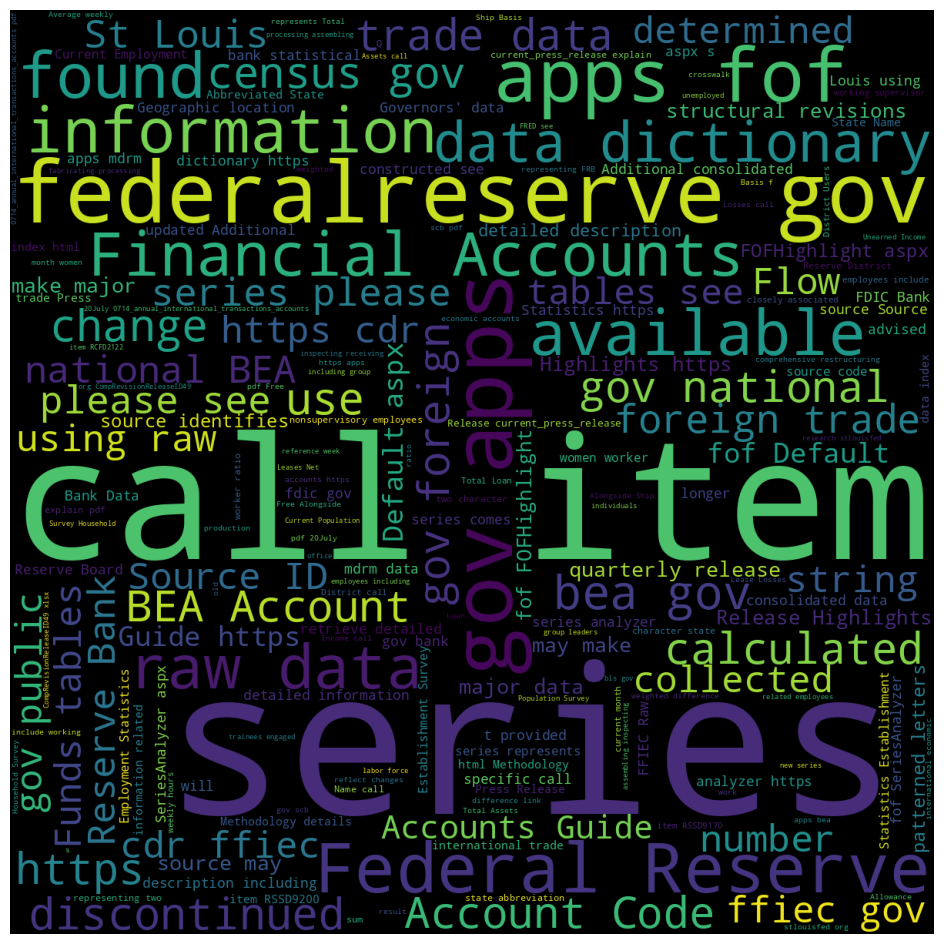

In [6]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud

subplots(figsize=(12, 12))
text = ' '.join(df['notes'].fillna(value='').values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')